# Calcul des probabilités et théorie des erreurs - Projet

## Table des matières

* [Introduction](#Introduction)

## Introduction
La question 6 concerne l'inversion d'une matrice en utilisant un réseau de noeuds. Cette opération est réalisée de deux manière différentes :
* Avec les noeuds en série
* Avec les noeuds en parallèle

Le temps nécessaire pour effectuer cette opération est mesuré et groupé en fonction de la taille de la matrice.


## Initialisation
Les importations et petites fonctions nécessaires pour le programme.

In [336]:
from collections import defaultdict
import numpy
import matplotlib.pyplot as plot
import scipy.stats as stats
import math

def normalize(f):
    return '{:0.5f}'.format(f)

## Lire les échantillons
Le fichier '.dat' fournit contient un tableau en trois colonnes :
1. La taille des matrices exprimée en nombre de lignes
2. Le temps mesuré lors d'un travail en série
3. le temps mesuré lors d'un travail en parallèle

Ces données seront stockées dans un dictionnaire de la forme suivante :
* Clés : Tailles des matrices (50, 150, ..., 950)
* Valeurs : Tuple contenant deux listes, la première contient les temps mesurés en série et la seconde les temps mesurés en parallèle




In [337]:
def load_file(name):
    samples = defaultdict(lambda: ([], []))
    with open(name) as file:
        for l in file:
            values = list(map(float, l.split()))
            size = int(values[0])
            times = values[1:]
            for i in range(2):
                samples[size][i].append(times[i])
        for size, times in samples.items():
            times[0].sort()
            times[1].sort()
        return samples

samples = load_file("Q6_donnee.dat")


## Visualiser les données

Il faut construire un graphique afin de représenter les deux jeux de données.



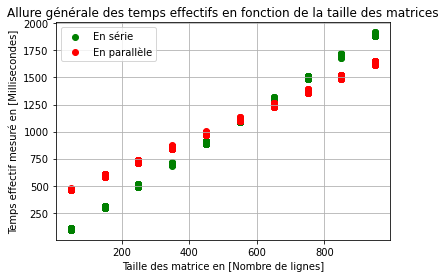

In [338]:
def overview_of_data(samples):
    x = []
    y1 = []
    y2 = []
    for size, times in samples.items():
        for t1, t2 in zip(times[0], times[1]):
                x.append(size)
                y1.append(t1)
                y2.append(t2)
    plot.scatter(x, y1, c='green', label='En série')
    plot.scatter(x, y2, c='red', label='En parallèle')
    plot.legend()
    plot.grid(True)
    plot.title('Allure générale des temps effectifs en fonction de la taille des matrices')
    plot.xlabel('Taille des matrice en [Nombre de lignes]')
    plot.ylabel('Temps effectif mesuré en [Millisecondes]')
    plot.show()


overview_of_data(samples)

Au vue de ce graphique, il est possible de tirer de premières conclusions :
* Dans les deux cas, le temps nécessaire augmente de proportionnellement avec la taille de la matrice
* Quand la taille est petite ($< \pm 550$), le travail en série semble plus performant que le travail en parallèle
* Par la suite, la situation s'inverse


## Construire les histogrammes



<ipython-input-339-11c32a594dbb>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-339-11c32a594dbb>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-339-11c32a594dbb>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-339-11c32a594dbb>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-339-11c32a594dbb>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-339-11c32a594dbb>:18: UserWarning: Matpl

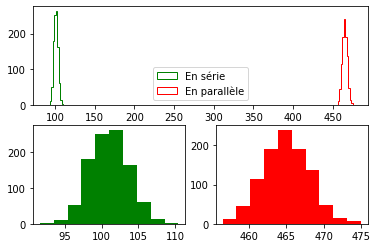

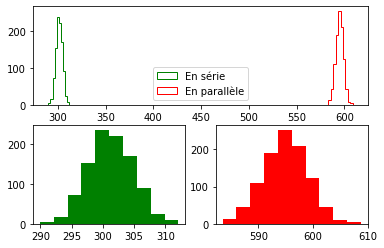

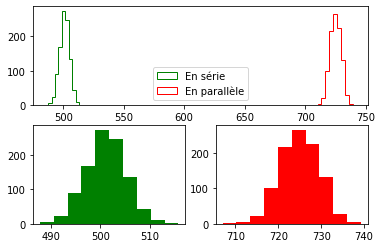

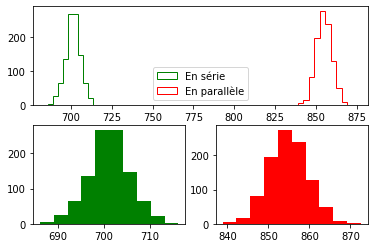

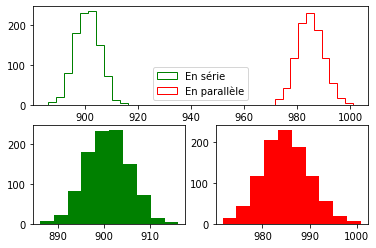

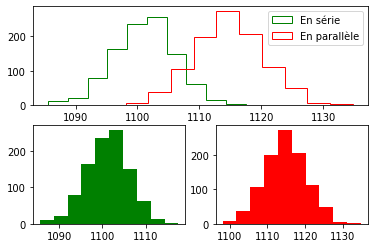

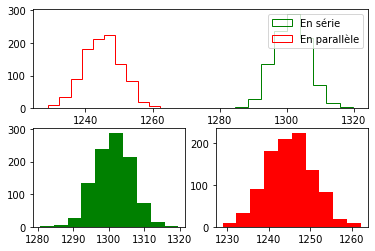

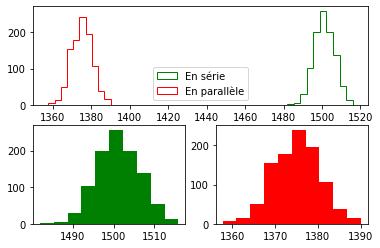

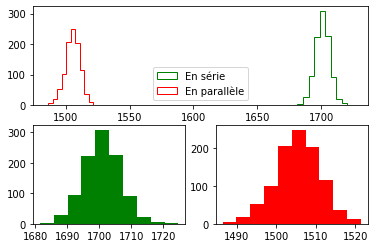

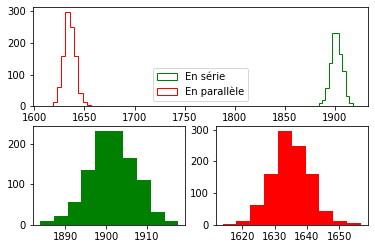

In [339]:

def construct_histo(samples):
    for size, times in samples.items():
        serial = []
        parallel = []
        for t1, t2 in zip(times[0], times[1]):
            serial.append(t1)
            parallel.append(t2)
        fig = plot.figure(constrained_layout=False)
        gs1 = fig.add_gridspec(nrows=2, ncols=2)
        up = fig.add_subplot(gs1[:-1, :])
        down_left = fig.add_subplot(gs1[-1, :-1])
        down_right = fig.add_subplot(gs1[-1, -1])
        up.hist(serial, color='green', label='En série', histtype='step')
        up.hist(parallel, color='red', label='En parallèle', histtype='step')
        down_left.hist(serial, color='green')
        down_right.hist(parallel, color='red')
        up.legend()
        fig.show()



construct_histo(samples)



Calculer la moyenne

In [340]:
'''
def mean(data):
	return sum(data) / len(data)
'''

'\ndef mean(data):\n\treturn sum(data) / len(data)\n'

Calculer la variance biaisée des données

In [341]:
'''
def variance(data):
	total = 0
	mean_data = mean(data)
	for x in data:
		total += (x - mean_data)**2
	return total / (len(data) - 1)
'''

'\ndef variance(data):\n\ttotal = 0\n\tmean_data = mean(data)\n\tfor x in data:\n\t\ttotal += (x - mean_data)**2\n\treturn total / (len(data) - 1)\n'

Afficher les résultats du test de Komogorov-Smirnov

In [342]:
'''
def show_kolmogorov_smirnov_test(samples):
	print('====== Kolmogorov-Smirnov test ======')
	for size, algs in samples.items():
		print('- Size : ' + str(size))
		for alg in range(3):
			sup = 0
			F0 = 0
			data = algs[alg]
			count = len(data)
			mean_data = mean(data)
			SD_data = math.sqrt(variance(data))
			for value in data:
				norm_value = (value - mean_data) / SD_data
				F0 += 1 / count
				Fn = stats.norm.cdf(norm_value)
				diff = abs(Fn - F0)
				sup = max(sup, diff)
			D_alpha = 0.134 # pour n = 100 et alpha = 0.05
			D_n = sup
			is_gaussian = D_n < D_alpha
			print('    Algo ' + str(alg + 1) + ' : ' + str(is_gaussian))
			print('moyenne : '+str(mean_data))
			print('variance : '+str(SD_data))
			print('D_n : '+str(D_n))
	print('=====================')
'''

"\ndef show_kolmogorov_smirnov_test(samples):\n\tprint('====== Kolmogorov-Smirnov test ======')\n\tfor size, algs in samples.items():\n\t\tprint('- Size : ' + str(size))\n\t\tfor alg in range(3):\n\t\t\tsup = 0\n\t\t\tF0 = 0\n\t\t\tdata = algs[alg]\n\t\t\tcount = len(data)\n\t\t\tmean_data = mean(data)\n\t\t\tSD_data = math.sqrt(variance(data))\n\t\t\tfor value in data:\n\t\t\t\tnorm_value = (value - mean_data) / SD_data\n\t\t\t\tF0 += 1 / count\n\t\t\t\tFn = stats.norm.cdf(norm_value)\n\t\t\t\tdiff = abs(Fn - F0)\n\t\t\t\tsup = max(sup, diff)\n\t\t\tD_alpha = 0.134 # pour n = 100 et alpha = 0.05\n\t\t\tD_n = sup\n\t\t\tis_gaussian = D_n < D_alpha\n\t\t\tprint('    Algo ' + str(alg + 1) + ' : ' + str(is_gaussian))\n\t\t\tprint('moyenne : '+str(mean_data))\n\t\t\tprint('variance : '+str(SD_data))\n\t\t\tprint('D_n : '+str(D_n))\n\tprint('=====================')\n"

Retourner le résultat du test de correspondance des moyennes

In [343]:
'''
#retourne le resultat du test de moyenne
def confidence_interval_test(samples):
	result = defaultdict(dict)
	for size, algs in samples.items():
		to_comp = [(i, j) for i in range(3) for j in range(i + 1, 3)]
		for (alg1, alg2) in to_comp:
			data1 = algs[alg1]
			data2 = algs[alg2]
			n1 = len(data1)
			n2 = len(data2)
			num = abs(mean(data1) - mean(data2))
			den = math.sqrt((variance(data1)**2 / n1) + \
						            (variance(data2)**2 / n2))
			test = num / den
			Z = 1.96 #distribution normale standard d ordre 1 - 0.05/2
			#a decommenter pour resultat du test de moyenne
			#print(test)
			compatible = test > Z
			result[size][(alg1, alg2)] = compatible
	return result
'''

'\n#retourne le resultat du test de moyenne\ndef confidence_interval_test(samples):\n\tresult = defaultdict(dict)\n\tfor size, algs in samples.items():\n\t\tto_comp = [(i, j) for i in range(3) for j in range(i + 1, 3)]\n\t\tfor (alg1, alg2) in to_comp:\n\t\t\tdata1 = algs[alg1]\n\t\t\tdata2 = algs[alg2]\n\t\t\tn1 = len(data1)\n\t\t\tn2 = len(data2)\n\t\t\tnum = abs(mean(data1) - mean(data2))\n\t\t\tden = math.sqrt((variance(data1)**2 / n1) + \t\t\t\t\t\t            (variance(data2)**2 / n2))\n\t\t\ttest = num / den\n\t\t\tZ = 1.96 #distribution normale standard d ordre 1 - 0.05/2\n\t\t\t#a decommenter pour resultat du test de moyenne\n\t\t\t#print(test)\n\t\t\tcompatible = test > Z\n\t\t\tresult[size][(alg1, alg2)] = compatible\n\treturn result\n'

Retourner le résultat du test de Fisher

In [344]:
'''
def fisher_test(samples):
	result = defaultdict(dict)
	for size, algs in samples.items():
		to_comp = [(i, j) for i in range(3) for j in range(i + 1, 3)]
		for (alg1, alg2) in to_comp:
			data1 = algs[alg1]
			data2 = algs[alg2]
			variance1 = variance(data1)
			variance2 = variance(data2)
			n1 = len(data1)
			n2 = len(data2)
			num = (n1 / (n1 - 1)) * variance1
			den = (n2 / (n2 - 1)) * variance2
			T = num / den
			if variance1 <= variance2:
				T = 1 / T
			F = 1.48 # Fisher-Snedecor with v1 = 100 and v2 = 100 and order 0.05/2
			#a decommenter pour resultat du test de Fisher
			#print(T)
			compatible = T < F
			result[size][(alg1, alg2)] = compatible
	return result
'''

'\ndef fisher_test(samples):\n\tresult = defaultdict(dict)\n\tfor size, algs in samples.items():\n\t\tto_comp = [(i, j) for i in range(3) for j in range(i + 1, 3)]\n\t\tfor (alg1, alg2) in to_comp:\n\t\t\tdata1 = algs[alg1]\n\t\t\tdata2 = algs[alg2]\n\t\t\tvariance1 = variance(data1)\n\t\t\tvariance2 = variance(data2)\n\t\t\tn1 = len(data1)\n\t\t\tn2 = len(data2)\n\t\t\tnum = (n1 / (n1 - 1)) * variance1\n\t\t\tden = (n2 / (n2 - 1)) * variance2\n\t\t\tT = num / den\n\t\t\tif variance1 <= variance2:\n\t\t\t\tT = 1 / T\n\t\t\tF = 1.48 # Fisher-Snedecor with v1 = 100 and v2 = 100 and order 0.05/2\n\t\t\t#a decommenter pour resultat du test de Fisher\n\t\t\t#print(T)\n\t\t\tcompatible = T < F\n\t\t\tresult[size][(alg1, alg2)] = compatible\n\treturn result\n'

Afficher .......

In [345]:
'''
#affiche la compatibilité entre les algo
def show_compatibility(samples):
	confidence_interval = confidence_interval_test(samples)
	fisher = fisher_test(samples)
	for size in samples:
		print('- Size : ' + str(size))
		to_comp = [(i, j) for i in range(2) for j in range(i + 1, 3)]
		for (alg1, alg2) in to_comp:
			compatible_mean = confidence_interval[size][(alg1, alg2)]
			compatible_variance = fisher[size][(alg1, alg2)]
			compatible = compatible_variance and compatible_mean
			print('    Algos ' + str(alg1 + 1) + ' and ' + str(alg2 + 1) + \
			    ' : (' + str(compatible_mean) + ', ' + \
				 str(compatible_variance) + ') => ' + str(compatible))
'''

"\n#affiche la compatibilité entre les algo\ndef show_compatibility(samples):\n\tconfidence_interval = confidence_interval_test(samples)\n\tfisher = fisher_test(samples)\n\tfor size in samples:\n\t\tprint('- Size : ' + str(size))\n\t\tto_comp = [(i, j) for i in range(2) for j in range(i + 1, 3)]\n\t\tfor (alg1, alg2) in to_comp:\n\t\t\tcompatible_mean = confidence_interval[size][(alg1, alg2)]\n\t\t\tcompatible_variance = fisher[size][(alg1, alg2)]\n\t\t\tcompatible = compatible_variance and compatible_mean\n\t\t\tprint('    Algos ' + str(alg1 + 1) + ' and ' + str(alg2 + 1) + \t\t\t    ' : (' + str(compatible_mean) + ', ' + \t\t\t\t str(compatible_variance) + ') => ' + str(compatible))\n"

Lancer l'application

In [346]:
'''
samples = load_samples()

show_data_overview(samples)
show_hists(samples)
show_kolmogorov_smirnov_test(samples)
show_compatibility(samples)
'''

'\nsamples = load_samples()\n\nshow_data_overview(samples)\nshow_hists(samples)\nshow_kolmogorov_smirnov_test(samples)\nshow_compatibility(samples)\n'